<a href="https://colab.research.google.com/github/welleson-lukas/data_science_python/blob/master/prevencao_ao_suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevenção ao suícidio - Setembro Amarelo
A campanha Setembro Amarelo salva vidas! 
Desde 2014, a Associação Brasileira de Psiquiatria – ABP, em parceria com o Conselho Federal de Medicina – CFM, organiza nacionalmente o Setembro Amarelo. O dia 10 deste mês é, oficialmente, o Dia Mundial de Prevenção ao Suicídio, mas a campanha acontece durante todo o ano.

​
São registrados cerca de 12 mil suicídios todos os anos no Brasil e mais de 01 milhão no mundo. Trata-se de uma triste realidade, que registra cada vez mais casos, principalmente entre os jovens. Cerca de 96,8% dos casos de suicídio estavam relacionados a transtornos mentais. Em primeiro lugar está a depressão, seguida do transtorno bipolar e abuso de substâncias.

​
Com o objetivo de prevenir e reduzir estes números a campanha Setembro Amarelo cresceu e hoje conquistamos o Brasil inteiro. Para isso, o apoio das nossas federadas, núcleos, associados e de toda a sociedade é fundamental.

In [0]:
#IMPORTAÇÃO DOS PACOTES NECESSÁRIOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#IMPORTAÇÃO DOS DADOS SOBRE O SUICIDIO PARA UM DATAFRAME
dadosdf = pd.read_csv("https://raw.githubusercontent.com/welleson-lukas/prevencao-ao-suicidio/172d3a355af4deb598eb6ec5f200111cdb472ca0/dadossuicidio-1985-2016.csv")

## Este arquivo csv está disponivel [aqui](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

O arquivo csv possui 27.820 linhas e 12 colunas divididas na seguinte forma:


*   **country**: pais onde os dados foram registrados
*   **year**: ano em que os dados foram registrados
*   **sex**: sexo considerado no registro (**male**: masculino / **female**: feminino)
*   **age**: faixa etária considerada
  *   5-14 anos
  *   15-24 anos
  *   25-34 anos
  *   35-54 anos
  *   55-74 anos
  *   75+ anos
*   **suicide_no**: número de suicídios
*   **population**: população para o grupo
*   **suicides/100k pop**: número de suicídios por 100 mil habitantes
*   **country_year**: identificador contendo região + ano
*   **HDI_for_year**: Índice de Desenvolvimento Humano (IDH) para o ano
*   **gdp_for_year**: Produto Interno Bruto (PIB) para o ano
*   **gdp_per_capita**: Produto Interno Bruto (PIB) per capita












In [5]:
# VAMOS EXTRAIR APENAS DADOS RELATIVOS AO BRASIL
df_brasil = dadosdf[dadosdf.country == "Brazil"].copy()

# VAMOS VER O FORMATO DO NOVO DATAFRAME
print("Formato do DataFrame: ", df_brasil.shape)

# VAMOS EXIBIR AS 5 PRIMEIRAS ENTRADAS DO NOVO DATAFRAME
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


## Tendência da taxa de suicídio no Brasil
Para ver essa tendência, é melhor sempre usar essa relação por 100 mil, pois a população do país cresceu muito de 1985 para 2015. Se formos comparar em termos absolutos, poderemos tirar conclusões erradas ou distorcidas.

No gráfico abaixo é facilmente percebido que a taxa de suicídios no Brasil é menor que a média mundial, porém são números que se mantem com picos crescentes ao longo de 30 anos


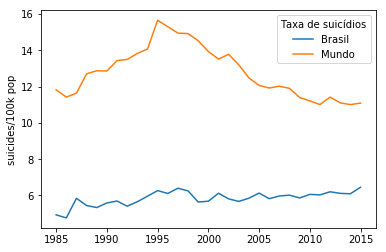

In [6]:
# VAMOS PEGAR A MÉDIA MUNDIAL E TAMBÉM A MÉDIA DO BRASIL EM SUICÍDIOS
anos = df_brasil.year.unique()
suicidios_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicidios_mundo_mean = dadosdf.groupby('year')['suicides/100k pop'].mean()

# POR NÃO EXISTIR DADOS DO ANO DE 2016 PARA O BRASIL, VAMOS REMOVER DA NOSSA ANALISE
suicidios_mundo_mean.drop(2016, inplace=True)

# AGORA VAMOS PLOTAR O LINEPLOT DO COMPARATIVO BRASIL - MUNDO
ax = sns.lineplot(x=anos, y=suicidios_brasil_mean, label='Brasil')
ax = sns.lineplot(x=anos, y=suicidios_mundo_mean, label='Mundo')

plt.legend(title="Taxa de suicídios")
plt.show()

##Faixa etária com maior índice de suicídio
O principal objetivo é identificar qual faixa etária de idade que tem a maior representatividade nos dados referentes ao suicídio e identificar a mudança nos ultimos 30 anos.

In [7]:
# VAMOS CRIAR UMA TABELA DINAMICA
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# REORDENAR AS TABELAS PARA ORDEM CRESCENTE
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# VAMOS VER AS 5 PRIMEIRAS ENTRADAS DA PIVOT TABLE
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


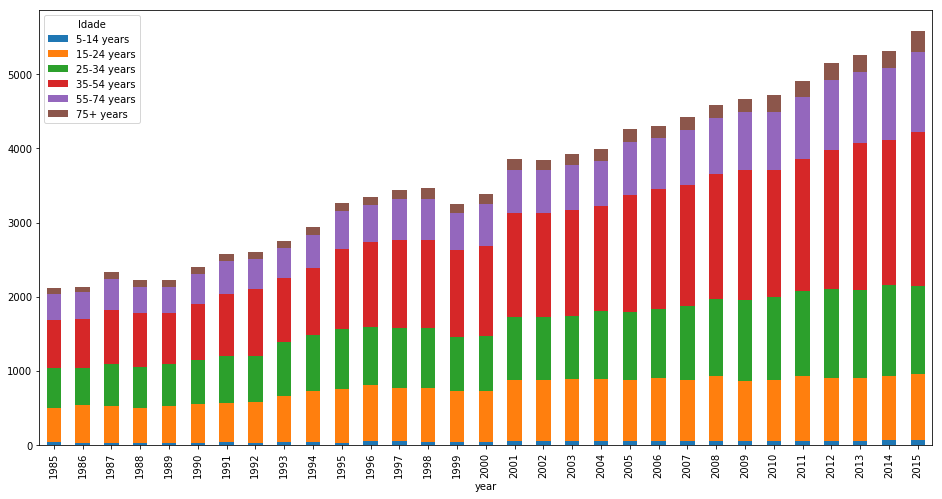

In [8]:
# PLOTAR A PIVOT TABLE DAS FAIXAS ETÁRIAS
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade")

##Dados do ano de 2015

In [9]:
# ESTATISTICA DE SUICIDIOS POR FAIXA ETÁRIA
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

##Taxa de suicídio entre homens e mulheres
Vamos análisar a porcentagem dos suicídios entre homens e mulheres

([<matplotlib.patches.Wedge at 0x7fa47812d860>,
 [Text(0.8556707493718532, 0.6912507277894262, 'mulheres'),
  Text(-0.8556707817316342, -0.6912506877325866, 'homens')],
 [Text(0.4667294996573744, 0.37704585152150516, '21.6%'),
  Text(-0.4667295173081641, -0.3770458296723199, '78.4%')])

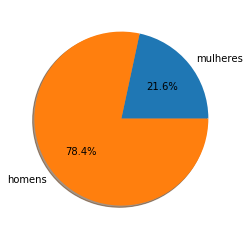

In [11]:
# EXTRAIR VALORES ENTRE HOMENS E MULHERES
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

#PLOTAR O GRAFICO DE PIZZA
plt.pie(homens_mulheres, labels =['mulheres', 'homens'], autopct='%1.1f%%', shadow=True)